In [1]:
from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation
from collections import deque
import matplotlib.cm as cm

In [17]:
Rsun = 0
Re = 147.49e9
Msun = 2.0e30
Me = 6.0e24
G = 6.67e-11
p = 1.8e29

mball = 10

x_s0 = Rsun
y_s0 = 0
x_e0 = Re
y_e0 = 0

def iterate(n,dt):
    
    sunx = [x_s0]
    suny = [y_s0]
    
    earthx = [x_e0]
    earthy = [y_e0]
    
    sunpx = [0]
    sunpy = [0]
    
    earthpx = [0]
    earthpy = [p]
    
    
    x_s = x_s0
    y_s = y_s0
    
    x_e = x_e0
    y_e = y_e0
    
    
    for i in range(0,n):
    
        d = np.sqrt((sunx[i]-earthx[i])**2+(suny[i]-earthy[i])**2)
        f_scale = - G * Msun * Me/d**3

        fx = f_scale*(sunx[i]-earthx[i])
        fy = f_scale*(suny[i]-earthy[i])

        

        sunpx.append(fx*dt + sunpx[i])
        earthpx.append(-fx*dt + earthpx[i])
        
        sunx.append(sunpx[i]*dt/Msun+sunx[i])
        earthx.append(earthpx[i]*dt/Me+earthx[i])
        
        sunpy.append(fy*dt + sunpy[i])
        earthpy.append(-fy*dt + earthpy[i])
        
        suny.append(sunpy[i]*dt/Msun+suny[i])
        earthy.append(earthpy[i]*dt/Me+earthy[i])
    
    

    return earthx,earthy,sunx,suny,earthpx,earthpy,sunpx,sunpy


x0 = Re-1.45e9
y0 = 0

# This is essentially a time dependent potential defined
# by gfield - which depends upon the moving positions of the 
# Earth and the Sun
def iterate2(n,dt):
    gfield = iterate(n,dt)
    
    ballx = [x0]
    bally = [y0]
    
    ballpx = [0]
    
    # To ensure equal angular momentum as earth    
    ballpy = [((147.49-1.45)/(147))*1.8e29*(mball/Me)]
    
    for i in range(0,n):
        dsun = np.sqrt((ballx[i]-gfield[2][i])**2+(bally[i]-gfield[3][i])**2)
        dearth = np.sqrt((ballx[i]-gfield[0][i])**2+(bally[i]-gfield[1][i])**2)

        #f_scale =  G * Msun * mball/dsun**3+ G * mball * Me/dearth**3
        fx = (G * Msun * mball/dsun**3)*(ballx[i]-gfield[2][i])+(G * mball * Me/dearth**3)*(ballx[i]-gfield[0][i])
        fy = (G * Msun * mball/dsun**3)*(bally[i]-gfield[3][i])+(G * mball * Me/dearth**3)*(bally[i]-gfield[1][i])

        ballpx.append(-fx*dt + ballpx[i])
        ballpy.append(-fy*dt + ballpy[i])


        ballx.append(ballpx[i]*dt/mball+ballx[i])
        bally.append(ballpy[i]*dt/mball+bally[i])
    return ballx,bally,gfield[0],gfield[1],gfield[2],gfield[3]
    


#iterate(3000,1/30)
#graph = iterate(10**6,100)

graph2 = iterate2(10**6,1000)



C:\Users\Paul Tan\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


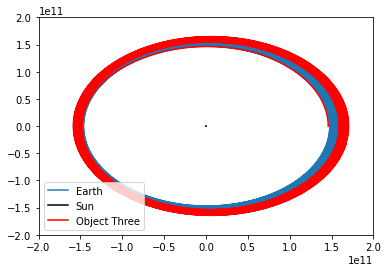

In [22]:
plt.plot(graph2[2],graph2[3])
plt.plot(graph2[4],graph2[5],"-k")

plt.plot(graph2[0],graph2[1],"-r")
plt.xlim([-2e11,2e11])
plt.ylim([-2e11,2e11])
plt.legend(["Earth","Sun","Object Three"])
plt.savefig("esun.png")

plt.show()


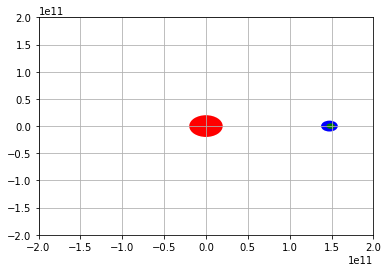

MovieWriter ffmpeg unavailable; using Pillow instead.


In [19]:
fig = plt.figure()

ax = fig.add_subplot(111,xlim=([-2e11,2e11]),ylim=([-2e11,2e11]))
ax.grid()
circle = plt.Circle((x_s0, y_s0), radius=2e10, fc='r')
circle2 = plt.Circle((x_e0, y_e0), radius=10e9, fc='b')
circle3 = plt.Circle((0, 0), radius=5e9, fc='g')
#time_template = 'time = %.1fs'
#time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
plt.xlim([-2e11,2e11])
plt.ylim([-2e11,2e11])
def init():
    circle.center = (x_s0,y_s0)
    circle2.center = (x_e0,y_e0)
    circle3.center = (Re+1.5e9,y_e0)
    ax.add_patch(circle)
    ax.add_patch(circle2)
    ax.add_patch(circle3)
    
    
    return circle, circle2, circle3,

speedup = 200

def animate(i):
    thisx = [graph2[0][speedup*i], graph2[2][speedup*i], graph2[4][speedup*i]]
    thisy = [graph2[1][speedup*i], graph2[3][speedup*i], graph2[5][speedup*i]]

   # print(thisx[2])
    #print(thisy[2])
    circle.center = (thisx[2], thisy[2])
    circle2.center = (thisx[1], thisy[1])
    circle3.center = (thisx[0], thisy[0])
    #time_text.set_text(time_template % (i*dt))
    return circle, circle2, circle3,
ani = animation.FuncAnimation(fig, animate, np.arange(1, 500),interval=25, blit=True,init_func = init)
plt.show()
ani.save("Animation.gif")

In [83]:
print(type(graph[2]))


<class 'int'>


In [138]:
animation.FuncAnimation?


Init signature:
animation.FuncAnimation(
    fig,
    func,
    frames=None,
    init_func=None,
    fargs=None,
    save_count=None,
    *,
    cache_frame_data=True,
    **kwargs,
)
Docstring:     
Makes an animation by repeatedly calling a function *func*.

Parameters
----------
fig : `~matplotlib.figure.Figure`
    The figure object used to get needed events, such as draw or resize.

func : callable
    The function to call at each frame.  The first argument will
    be the next value in *frames*.   Any additional positional
    arguments can be supplied via the *fargs* parameter.

    The required signature is::

        def func(frame, *fargs) -> iterable_of_artists

    If ``blit == True``, *func* must return an iterable of all artists
    that were modified or created. This information is used by the blitting
    algorithm to determine which parts of the figure have to be updated.
    The return value is unused if ``blit == False`` and may be omitted in
    that case.

frames :